In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
from GradientBoostedTreesRegressor import GradientBoostedTreesRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Iris Dataset | Classification

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Target labels:", target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target labels: ['setosa' 'versicolor' 'virginica']


In [14]:
random_forest = GradientBoostedTreesRegressor(
    num_trees=10,
    learning_rate=1e-3,
    min_samples_per_node=5,
    max_depth=5,
    impurity_measure='variance',
    num_targets=3
)

wawa = random_forest.build_forest(X_train, y_train)

In [15]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

1.008954880330461 1
0.0 0
2.017909760660922 2
1.008954880330461 1
1.010739856440553 1
0.0 0
1.008954880330461 1
2.017909760660922 2
1.008954880330461 1
1.008954880330461 1
2.017909760660922 2
0.0 0
0.0 0
0.0 0
0.0 0
1.008954880330461 1
2.017909760660922 2
1.008954880330461 1
1.008954880330461 1
2.017909760660922 2
0.0 0
2.017909760660922 2
0.0 0
2.017909760660922 2
2.017909760660922 2
2.017909760660922 2
2.017909760660922 2
2.017909760660922 2
0.0 0
0.0 0


# Diabetes Dataset | Regression

In [16]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data.to_numpy(), diabetes.target.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
random_forest = GradientBoostedTreesRegressor(
    num_trees=100,
    learning_rate=1e-3,
    min_samples_per_node=5,
    max_depth=np.inf,
    loss_measure='mse',
    impurity_measure='variance',
    # num_targets=2
)

In [28]:
wawa = random_forest.build_forest(X_train, y_train)

In [29]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

204.53879239908102 219.0
136.299712432006 70.0
205.14518993511768 202.0
168.24179220747348 230.0
199.3699876708326 111.0
99.90899210648621 84.0
258.62717154366146 242.0
279.04385896168793 272.0
212.82313621525788 94.0
187.60087756971092 96.0
102.83485608677526 94.0
281.79050491434657 252.0
78.76025717536587 99.0
242.0237069451346 297.0
87.30333385619355 135.0
135.6661406459052 67.0
336.554247096586 295.0
192.13819379338895 264.0
303.48661307482763 170.0
175.73156815270679 275.0
181.59536506231638 310.0
69.92265594283283 64.0
52.996739011732565 128.0
164.58462399557578 232.0
101.8121095259241 129.0
124.90204901344323 118.0
306.39742837440843 263.0
177.210578644573 77.0
64.53965518536921 48.0
199.3699876708326 107.0
312.8584700619807 140.0
59.93974505970251 113.0
244.33321475224832 90.0
281.60943559920986 164.0
183.79816388158173 180.0
188.87472783627962 233.0
82.7873730651493 42.0
134.88087706448673 84.0
224.52269722198014 172.0
84.22971947921063 63.0
64.53965518536921 48.0
97.632140557

# Diabetes Dataset | Regression

In [30]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data.to_numpy(), diabetes.target.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
random_forest = GradientBoostedTreesRegressor(
    min_samples_per_node=5,
    max_depth=3,
    impurity_measure='variance',
    # num_targets=2
)

In [ ]:
wawa = random_forest.build_forest_legacy(X_train, y_train)

In [ ]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

160.4757727211161 219.0
186.94316413434063 70.0
175.1213509524086 202.0
247.58323080428346 230.0
101.11792038921075 111.0
101.11792038921075 84.0
266.8808013178171 242.0
212.62977863390248 272.0
159.32801761907527 94.0
158.57951004963388 96.0
101.11792038921075 94.0
195.41217220844723 252.0
92.36439648969113 99.0
247.58323080428346 297.0
101.11792038921075 135.0
127.83698223958231 67.0
221.10582686833737 295.0
284.2878568971449 264.0
186.94316413434063 170.0
220.77630579680272 275.0
169.79146791147292 310.0
109.86172669551706 64.0
92.36439648969113 128.0
198.15512199617964 232.0
158.57951004963388 129.0
178.18964023482096 118.0
186.94316413434063 263.0
125.69422097469328 77.0
92.36439648969113 48.0
101.11792038921075 107.0
210.85051353874883 140.0
92.36439648969113 113.0
152.34165958234416 90.0
201.56090292024413 164.0
152.34165958234416 180.0
227.70740740740743 233.0
115.51414635504207 42.0
122.01672700020336 84.0
201.56090292024413 172.0
92.36439648969113 63.0
92.36439648969113 48.0


# Sine Wave | Regression

Reference: https://colab.research.google.com/drive/1YY7xaI1rRuVcrS-sCFTnMX5rPf2qFS8v#scrollTo=k-_xGd4vXcjN

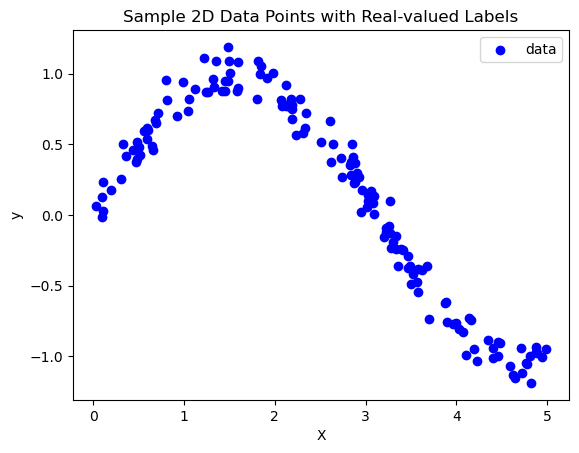

In [31]:
np.random.seed(0)
import matplotlib.pyplot as plt

n_samples = 150

X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randn(n_samples)*0.1

plt.figure()
plt.scatter(X, y, color='blue', label='data')
plt.title('Sample 2D Data Points with Real-valued Labels')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [41]:
random_forest = GradientBoostedTreesRegressor(
    num_trees=20,
    learning_rate=1e-3,
    min_samples_per_node=5,
    max_depth=10,
    loss_measure='mse',
    impurity_measure='variance'
).build_forest(X_train, y_train)

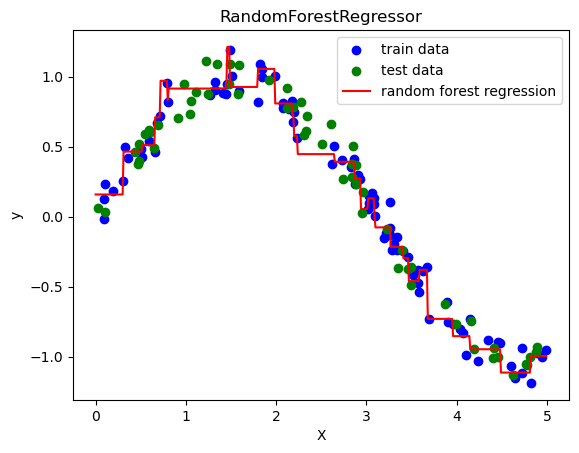

In [42]:
X_grid = np.arange(0, 5, 0.01)[:, np.newaxis]
y_preds= []
for x in X_grid:
    y_preds.append(random_forest.predict(x))

y_preds = np.array(y_preds)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='green', label='test data')
plt.plot(X_grid, y_preds, color='red', label='random forest regression')
plt.title('RandomForestRegressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()